In [166]:
#Credit Card Fraud Detection 


In [167]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

In [168]:
# 2. Load the Dataset
df = pd.read_csv(r'C:\Users\RAIHANA-PC\Downloads\task2 credit card\fraudTest.csv')
df.head()
# Check column names
print("Columns:", df.columns)

# Drop non-numeric or ID columns you don’t want
drop_cols = ['trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender', 'job', 'city', 'state', 'street', 'zip', 'dob', 'unix_time', 'merch_lat', 'merch_long']
df = df.drop(columns=drop_cols, errors='ignore')


Columns: Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'gender', 'lat',
       'long', 'city_pop', 'dob', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud'],
      dtype='object')


Dataset shape: (100000, 5)
Missing values:
 amt         0
lat         0
long        0
city_pop    0
is_fraud    0
dtype: int64


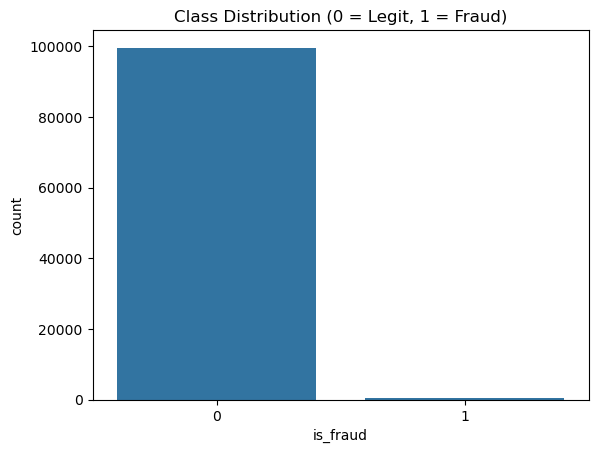

In [169]:
# 3.  Dataset Overview
print("Dataset shape:", df.shape)
print("Missing values:\n", df.isnull().sum())


# Class distribution (imbalance check)
sns.countplot(x='is_fraud', data=df)
plt.title("Class Distribution (0 = Legit, 1 = Fraud)")
plt.show()


In [170]:
# 4. Feature/Label Split
df['is_fraud'] = df['is_fraud'].astype(int)

X = df.drop('is_fraud', axis=1)
y = df['is_fraud']


X = pd.get_dummies(X, drop_first=True)



In [171]:
# 5. Feature Scaling – Only 'Amount' needs it
scaler = StandardScaler()
X['amt'] = scaler.fit_transform(X['amt'].values.reshape(-1, 1))


In [172]:
# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [173]:
# 7. Model 1 – Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)


In [174]:
# 8.  Model 2 – Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)


 === Logistic Regression ===


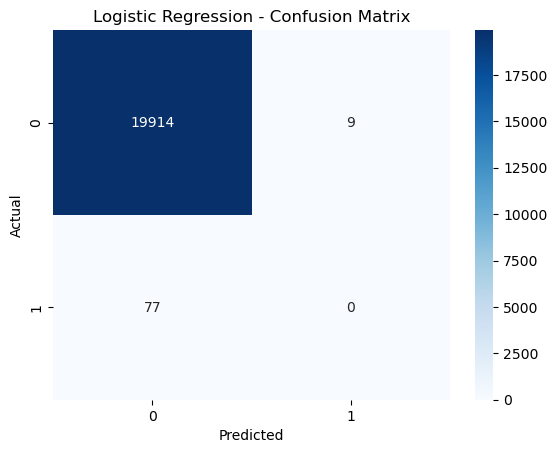

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19923
           1       0.00      0.00      0.00        77

    accuracy                           1.00     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.99      1.00      0.99     20000


 === Random Forest ===


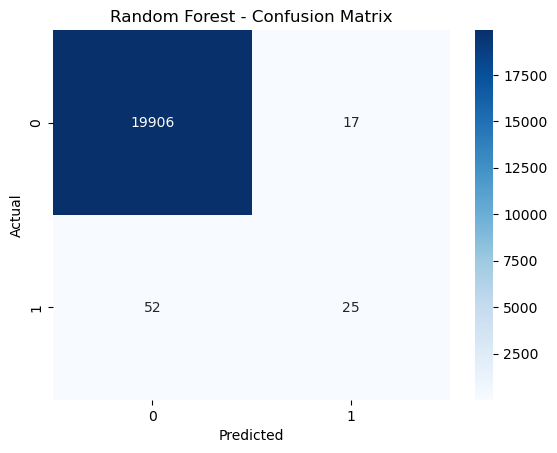

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19923
           1       0.60      0.32      0.42        77

    accuracy                           1.00     20000
   macro avg       0.80      0.66      0.71     20000
weighted avg       1.00      1.00      1.00     20000



In [175]:
# 9.Evaluation

def evaluate_model(name, y_true, y_pred):
    print(f"\n === {name} ===")
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print(classification_report(y_true, y_pred))

evaluate_model("Logistic Regression", y_test, log_preds)
evaluate_model("Random Forest", y_test, rf_preds)